# Visualizacion de Datos Financieros: Enfoque en el Mercado Peruano

## Tutorial Completo con Matplotlib, Pyplot y Seaborn

---

### Objetivos de Aprendizaje

Al finalizar este notebook, podras:

1. **Analizar acciones peruanas** listadas en la BVL y ADRs en NYSE
2. **Visualizar el tipo de cambio** Sol/Dolar y su impacto en inversiones
3. **Comparar sectores clave** de la economia peruana (mineria, banca, consumo)
4. **Calcular ratios financieros** relevantes para el contexto peruano
5. **Crear dashboards profesionales** para analisis de mercado

---

### Contexto del Mercado Peruano

| Aspecto | Descripcion |
|---------|-------------|
| **BVL** | Bolsa de Valores de Lima - principal mercado de valores del Peru |
| **ADRs** | American Depositary Receipts - acciones peruanas en NYSE/NASDAQ |
| **BCRP** | Banco Central de Reserva del Peru - politica monetaria |
| **Sectores Clave** | Mineria, Banca, Consumo, Construccion |

### Empresas Peruanas Analizadas

| Ticker | Empresa | Sector |
|--------|---------|--------|
| BAP | Credicorp (BCP, Prima AFP, Pacifico) | Financiero |
| SCCO | Southern Copper | Mineria |
| BVN | Buenaventura | Mineria (Oro/Plata) |
| IFS | Intercorp Financial Services | Financiero |
| AENZ | Aenza (ex Grana y Montero) | Construccion |

## 1. Configuracion e Importacion de Librerias

In [25]:
# Librerias principales
import numpy as np
import pandas as pd

# Librerias de visualizacion
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Para obtener datos financieros
import yfinance as yf

# Manejo de fechas
from datetime import datetime, timedelta

# Configuracion
import warnings
warnings.filterwarnings('ignore')

# Opciones de visualizacion
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Estilo de graficos
plt.style.use('seaborn-v0_8-whitegrid')

print("Librerias importadas correctamente!")
print(f"Fecha de analisis: {datetime.now().strftime('%d/%m/%Y')}")

Librerias importadas correctamente!
Fecha de analisis: 09/01/2026


## 2. Descarga de Datos del Mercado Peruano

### 2.1 Acciones Peruanas (ADRs en NYSE)

In [26]:
# Definir empresas peruanas (ADRs disponibles en yfinance)
tickers_peru = ['BAP', 'SCCO', 'BVN', 'IFS']

nombres_empresas = {
    'BAP': 'Credicorp',
    'SCCO': 'Southern Copper',
    'BVN': 'Buenaventura',
    'IFS': 'Intercorp Financial'
}

sectores = {
    'BAP': 'Financiero',
    'SCCO': 'Mineria',
    'BVN': 'Mineria',
    'IFS': 'Financiero'
}

# Periodo de analisis (ultimos 3 anios)
fecha_fin = datetime.now()
fecha_inicio = fecha_fin - timedelta(days=1095)  # 3 anios

print("Descargando datos de acciones peruanas...")
datos_peru = yf.download(tickers_peru, start=fecha_inicio, end=fecha_fin, progress=False)

# Procesar datos
if isinstance(datos_peru.columns, pd.MultiIndex):
    precios_peru = datos_peru['Close'].copy()
    volumen_peru = datos_peru['Volume'].copy()
else:
    precios_peru = datos_peru[['Close']].copy()
    volumen_peru = datos_peru[['Volume']].copy()

# Renombrar columnas
precios_peru.columns = [nombres_empresas.get(col, col) for col in precios_peru.columns]
volumen_peru.columns = [nombres_empresas.get(col, col) for col in volumen_peru.columns]

print(f"\nDatos descargados desde {fecha_inicio.strftime('%d/%m/%Y')} hasta {fecha_fin.strftime('%d/%m/%Y')}")
print(f"Empresas: {list(precios_peru.columns)}")
print(f"Observaciones: {len(precios_peru)}")
precios_peru.tail()

Descargando datos de acciones peruanas...

Datos descargados desde 10/01/2023 hasta 09/01/2026
Empresas: ['Credicorp', 'Buenaventura', 'Intercorp Financial', 'Southern Copper']
Observaciones: 753


,Credicorp,Buenaventura,Intercorp Financial,Southern Copper
Date,,,,
2026-01-05,292.50,29.53,42.74,154.39
2026-01-06,295.71,30.14,42.64,160.08
2026-01-07,293.70,30.74,42.87,158.09
2026-01-08,303.84,31.21,44.92,160.55
2026-01-09,304.98,32.01,45.29,169.62


### 2.2 Tipo de Cambio Sol/Dolar (PEN/USD)

In [27]:
# Descargar tipo de cambio PEN/USD
print("Descargando tipo de cambio Sol/Dolar...")
tc_data = yf.download('PENUSD=X', start=fecha_inicio, end=fecha_fin, progress=False)

# Procesar datos - manejar diferentes formatos de yfinance
if isinstance(tc_data.columns, pd.MultiIndex):
    # Flatten MultiIndex columns
    tc_data.columns = tc_data.columns.get_level_values(0)

tipo_cambio = tc_data[['Close']].copy()
tipo_cambio.columns = ['PEN/USD']

# El tipo de cambio en yfinance esta invertido (USD/PEN), necesitamos PEN/USD
# Si el valor es muy bajo (<1), esta en formato PEN/USD (cuantos dolares por sol)
# Si el valor es alto (>1), esta en formato USD/PEN (cuantos soles por dolar)
if tipo_cambio['PEN/USD'].mean() < 1:
    tipo_cambio['Soles por Dolar'] = 1 / tipo_cambio['PEN/USD']
else:
    tipo_cambio['Soles por Dolar'] = tipo_cambio['PEN/USD']

print(f"\nTipo de cambio promedio: S/. {tipo_cambio['Soles por Dolar'].mean():.2f} por USD")
print(f"Tipo de cambio actual: S/. {tipo_cambio['Soles por Dolar'].iloc[-1]:.2f} por USD")
print(f"Minimo del periodo: S/. {tipo_cambio['Soles por Dolar'].min():.2f}")
print(f"Maximo del periodo: S/. {tipo_cambio['Soles por Dolar'].max():.2f}")
tipo_cambio.tail()

Descargando tipo de cambio Sol/Dolar...

Tipo de cambio promedio: S/. 3.66 por USD
Tipo de cambio actual: S/. 3.36 por USD
Minimo del periodo: S/. 3.28
Maximo del periodo: S/. 3.88


,PEN/USD,Soles por Dolar
Date,,
2026-01-05,0.30,3.30
2026-01-06,0.30,3.36
2026-01-07,0.30,3.36
2026-01-08,0.30,3.36
2026-01-09,0.30,3.36


### 2.3 Commodities Relevantes para Peru (Cobre, Oro, Plata)

In [28]:
# Commodities importantes para la economia peruana
commodities = ['GC=F', 'SI=F', 'HG=F']  # Oro, Plata, Cobre
nombres_commodities = {
    'GC=F': 'Oro',
    'SI=F': 'Plata',
    'HG=F': 'Cobre'
}

print("Descargando precios de commodities...")
datos_commodities = yf.download(commodities, start=fecha_inicio, end=fecha_fin, progress=False)

if isinstance(datos_commodities.columns, pd.MultiIndex):
    precios_commodities = datos_commodities['Close'].copy()
else:
    precios_commodities = datos_commodities[['Close']].copy()

precios_commodities.columns = [nombres_commodities.get(col, col) for col in precios_commodities.columns]

print(f"\nPrecios actuales de commodities:")
print(f"  Oro: ${precios_commodities['Oro'].iloc[-1]:,.2f} / oz")
print(f"  Plata: ${precios_commodities['Plata'].iloc[-1]:.2f} / oz")
print(f"  Cobre: ${precios_commodities['Cobre'].iloc[-1]:.2f} / lb")
precios_commodities.tail()

Descargando precios de commodities...

Precios actuales de commodities:
  Oro: $4,514.00 / oz
  Plata: $80.18 / oz
  Cobre: $5.92 / lb


,Oro,Cobre,Plata
Date,,,
2026-01-05,4436.90,5.92,76.16
2026-01-06,4482.20,6.01,80.53
2026-01-07,4449.30,5.81,77.14
2026-01-08,4449.70,5.75,74.72
2026-01-09,4514.00,5.92,80.18


### 2.4 Indices de Referencia (S&P 500, Mercados Emergentes)

In [29]:
# Indices de referencia para comparacion
indices = ['^GSPC', 'EEM']  # S&P 500, ETF Mercados Emergentes
nombres_indices = {
    '^GSPC': 'S&P 500',
    'EEM': 'Mercados Emergentes'
}

print("Descargando indices de referencia...")
datos_indices = yf.download(indices, start=fecha_inicio, end=fecha_fin, progress=False)

if isinstance(datos_indices.columns, pd.MultiIndex):
    precios_indices = datos_indices['Close'].copy()
else:
    precios_indices = datos_indices[['Close']].copy()

precios_indices.columns = [nombres_indices.get(col, col) for col in precios_indices.columns]

print("\nIndices de referencia descargados correctamente")
precios_indices.tail()

Descargando indices de referencia...

Indices de referencia descargados correctamente


,Mercados Emergentes,S&P 500
Date,,
2026-01-05,56.86,6902.05
2026-01-06,57.28,6944.82
2026-01-07,56.85,6920.93
2026-01-08,56.87,6921.46
2026-01-09,57.10,6964.72


### 2.5 Calcular Retornos

In [30]:
# Calcular retornos diarios
retornos_peru = precios_peru.pct_change().dropna()
retornos_commodities = precios_commodities.pct_change().dropna()
retornos_indices = precios_indices.pct_change().dropna()
retornos_tc = tipo_cambio['Soles por Dolar'].pct_change().dropna()

# Retornos acumulados
retornos_acum_peru = (1 + retornos_peru).cumprod() - 1

print("Estadisticas de Retornos Diarios (Acciones Peruanas):")
print("="*60)
print(retornos_peru.describe().round(4))

Estadisticas de Retornos Diarios (Acciones Peruanas):
       Credicorp  Buenaventura  Intercorp Financial  Southern Copper
count     752.00        752.00               752.00           752.00
mean        0.00          0.00                 0.00             0.00
std         0.02          0.02                 0.02             0.02
min        -0.07         -0.10                -0.07            -0.10
25%        -0.01         -0.01                -0.01            -0.01
50%         0.00          0.00                 0.00             0.00
75%         0.01          0.01                 0.01             0.01
max         0.08          0.25                 0.08             0.12


## 3. Visualizacion de Acciones Peruanas

### 3.1 Evolucion de Precios

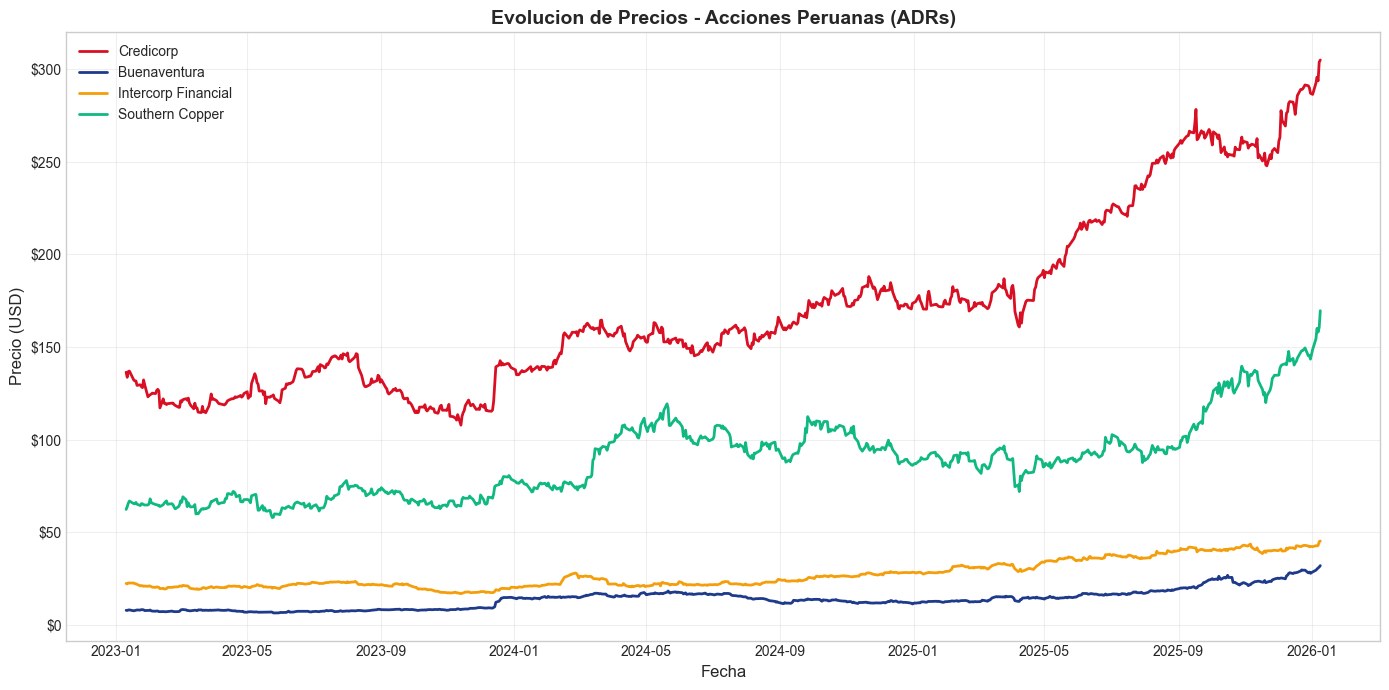

In [31]:
# Colores personalizados (inspirados en la bandera peruana y colores corporativos)
colores_peru = ['#D91023', '#1E3A8A', '#F59E0B', '#10B981']  # Rojo, Azul, Dorado, Verde

fig, ax = plt.subplots(figsize=(14, 7))

for i, empresa in enumerate(precios_peru.columns):
    ax.plot(precios_peru.index, precios_peru[empresa], 
            label=empresa, color=colores_peru[i], linewidth=2)

ax.set_title('Evolucion de Precios - Acciones Peruanas (ADRs)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Precio (USD)', fontsize=12)
ax.legend(loc='upper left', framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

### 3.2 Rendimiento Normalizado (Base 100)

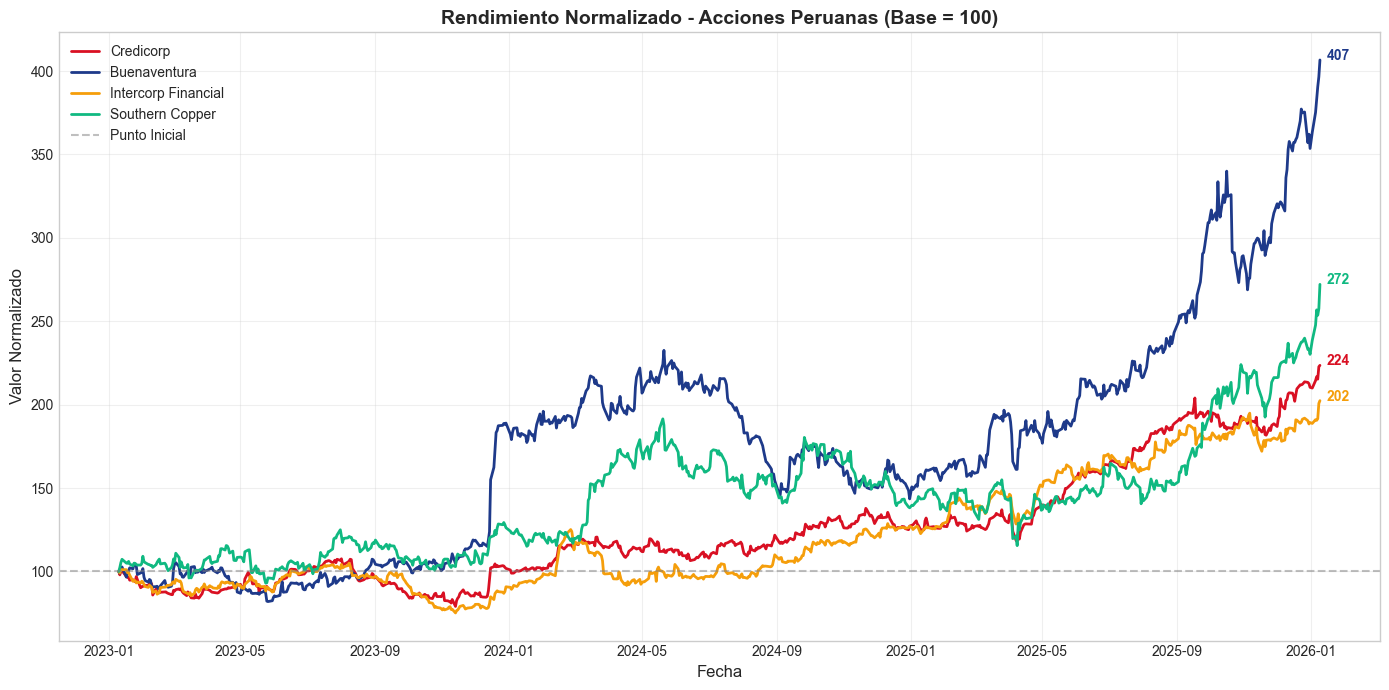

In [32]:
# Normalizar precios (base 100)
precios_norm = precios_peru / precios_peru.iloc[0] * 100

fig, ax = plt.subplots(figsize=(14, 7))

for i, empresa in enumerate(precios_norm.columns):
    ax.plot(precios_norm.index, precios_norm[empresa], 
            label=empresa, color=colores_peru[i], linewidth=2)

# Linea de referencia
ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5, label='Punto Inicial')

ax.set_title('Rendimiento Normalizado - Acciones Peruanas (Base = 100)', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Valor Normalizado', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Agregar anotacion del rendimiento final
for i, empresa in enumerate(precios_norm.columns):
    valor_final = precios_norm[empresa].iloc[-1]
    ax.annotate(f'{valor_final:.0f}', 
                xy=(precios_norm.index[-1], valor_final),
                xytext=(5, 0), textcoords='offset points',
                fontsize=10, color=colores_peru[i], fontweight='bold')

plt.tight_layout()
plt.show()

### 3.3 Comparacion por Sectores

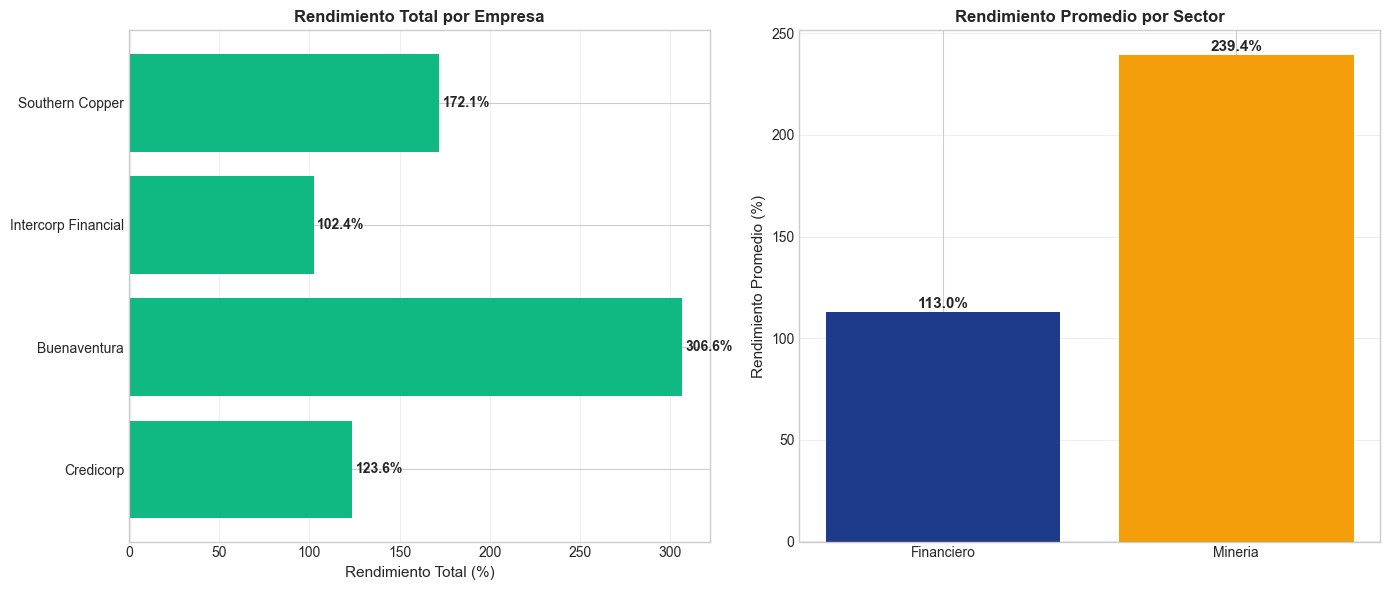

In [33]:
# Crear DataFrame con sector
sector_map = {
    'Credicorp': 'Financiero',
    'Southern Copper': 'Mineria',
    'Buenaventura': 'Mineria',
    'Intercorp Financial': 'Financiero'
}

# Calcular rendimiento total por accion
rendimiento_total = ((precios_peru.iloc[-1] - precios_peru.iloc[0]) / precios_peru.iloc[0] * 100)
rendimiento_df = pd.DataFrame({
    'Empresa': rendimiento_total.index,
    'Rendimiento': rendimiento_total.values,
    'Sector': [sector_map[e] for e in rendimiento_total.index]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico de barras por empresa
colores_barras = ['#10B981' if x > 0 else '#EF4444' for x in rendimiento_df['Rendimiento']]
bars = axes[0].barh(rendimiento_df['Empresa'], rendimiento_df['Rendimiento'], color=colores_barras)
axes[0].set_xlabel('Rendimiento Total (%)', fontsize=11)
axes[0].set_title('Rendimiento Total por Empresa', fontsize=12, fontweight='bold')
axes[0].axvline(x=0, color='black', linewidth=0.8)
axes[0].grid(True, axis='x', alpha=0.3)

for bar, valor in zip(bars, rendimiento_df['Rendimiento']):
    axes[0].text(valor + (2 if valor > 0 else -2), bar.get_y() + bar.get_height()/2,
                 f'{valor:.1f}%', va='center', fontsize=10, fontweight='bold',
                 ha='left' if valor > 0 else 'right')

# Grafico por sector
sector_rendimiento = rendimiento_df.groupby('Sector')['Rendimiento'].mean()
colores_sector = ['#1E3A8A', '#F59E0B']
bars2 = axes[1].bar(sector_rendimiento.index, sector_rendimiento.values, color=colores_sector)
axes[1].set_ylabel('Rendimiento Promedio (%)', fontsize=11)
axes[1].set_title('Rendimiento Promedio por Sector', fontsize=12, fontweight='bold')
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].axhline(y=0, color='black', linewidth=0.8)

for bar, valor in zip(bars2, sector_rendimiento.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, valor + 2,
                 f'{valor:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Analisis del Tipo de Cambio Sol/Dolar

### 4.1 Evolucion del Tipo de Cambio

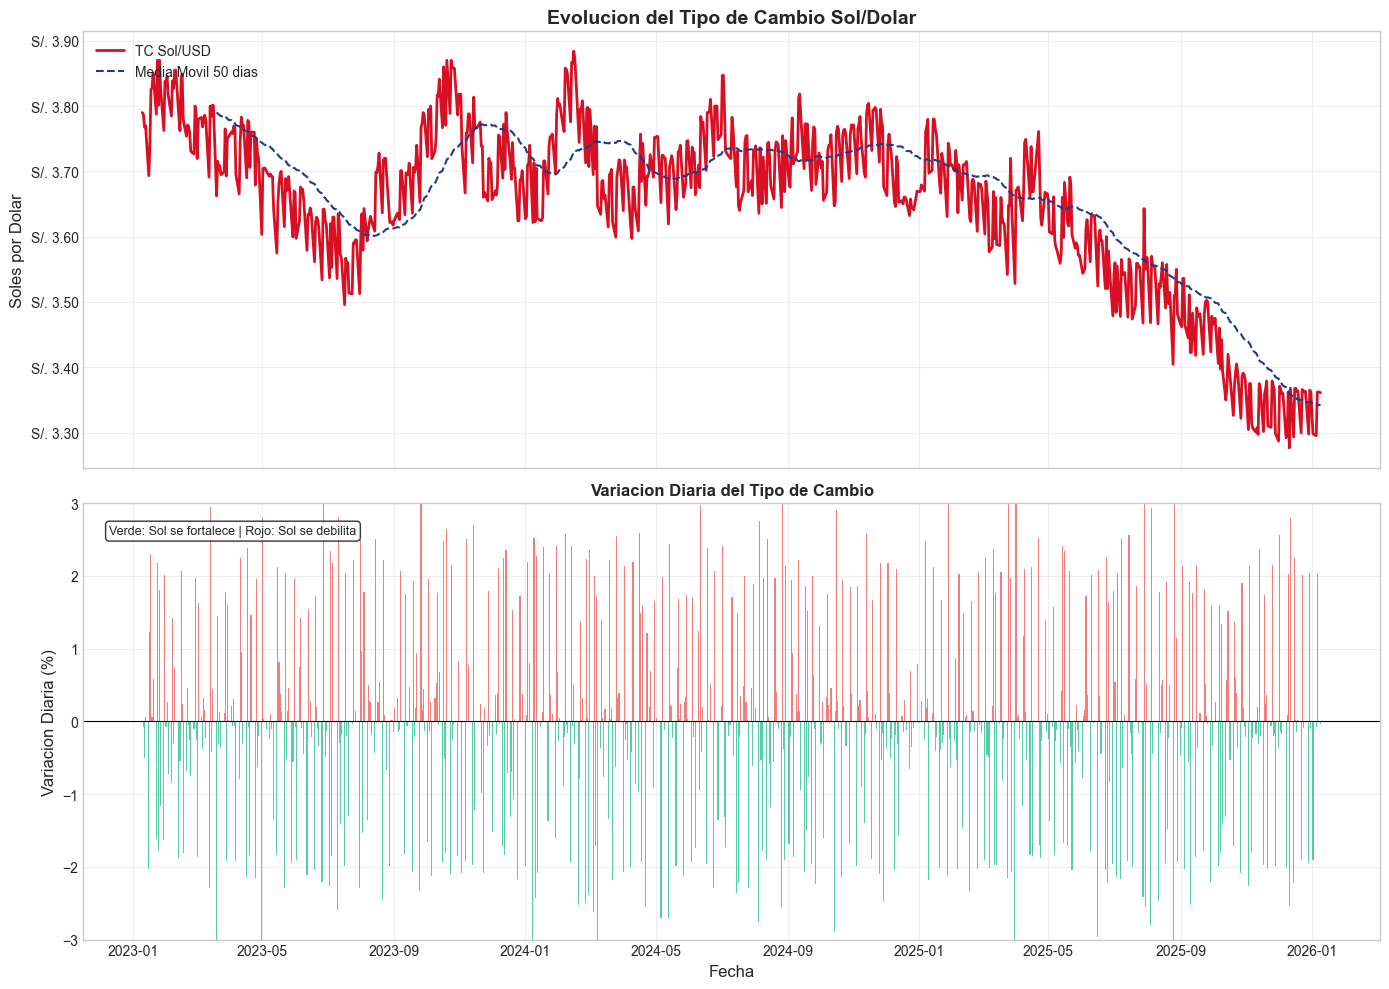

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Grafico de tipo de cambio
axes[0].plot(tipo_cambio.index, tipo_cambio['Soles por Dolar'], 
             color='#D91023', linewidth=2, label='TC Sol/USD')

# Media movil de 50 dias
ma_50 = tipo_cambio['Soles por Dolar'].rolling(50).mean()
axes[0].plot(tipo_cambio.index, ma_50, color='#1E3A8A', 
             linewidth=1.5, linestyle='--', label='Media Movil 50 dias')

axes[0].set_ylabel('Soles por Dolar', fontsize=12)
axes[0].set_title('Evolucion del Tipo de Cambio Sol/Dolar', fontsize=14, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'S/. {x:.2f}'))

# Variacion porcentual diaria
variacion_tc = tipo_cambio['Soles por Dolar'].pct_change() * 100
colors = ['#10B981' if x < 0 else '#EF4444' for x in variacion_tc.dropna()]
axes[1].bar(variacion_tc.dropna().index, variacion_tc.dropna().values, 
            color=colors, alpha=0.7, width=1)
axes[1].axhline(y=0, color='black', linewidth=0.8)
axes[1].set_xlabel('Fecha', fontsize=12)
axes[1].set_ylabel('Variacion Diaria (%)', fontsize=12)
axes[1].set_title('Variacion Diaria del Tipo de Cambio', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(-3, 3)

# Nota: Verde = Sol se fortalece (menos soles por dolar), Rojo = Sol se debilita
axes[1].text(0.02, 0.95, 'Verde: Sol se fortalece | Rojo: Sol se debilita', 
             transform=axes[1].transAxes, fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

### 4.2 Distribucion del Tipo de Cambio

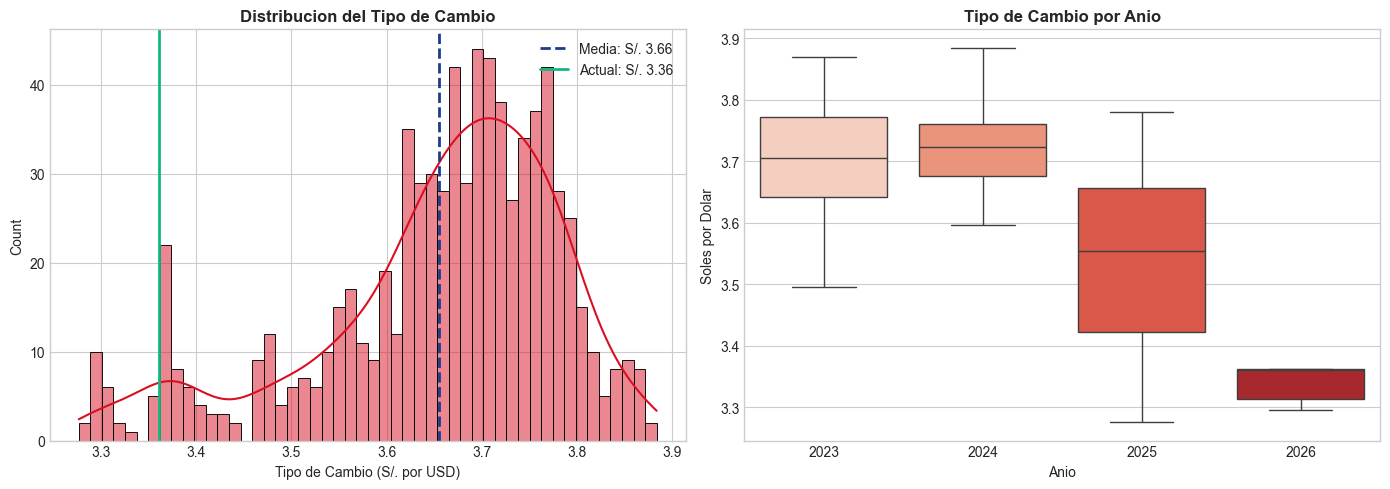

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma del tipo de cambio
sns.histplot(tipo_cambio['Soles por Dolar'], kde=True, ax=axes[0], color='#D91023', bins=50)
axes[0].axvline(tipo_cambio['Soles por Dolar'].mean(), color='#1E3A8A', 
                linestyle='--', linewidth=2, label=f'Media: S/. {tipo_cambio["Soles por Dolar"].mean():.2f}')
axes[0].axvline(tipo_cambio['Soles por Dolar'].iloc[-1], color='#10B981', 
                linestyle='-', linewidth=2, label=f'Actual: S/. {tipo_cambio["Soles por Dolar"].iloc[-1]:.2f}')
axes[0].set_xlabel('Tipo de Cambio (S/. por USD)')
axes[0].set_title('Distribucion del Tipo de Cambio', fontsize=12, fontweight='bold')
axes[0].legend()

# Box plot por anio
tc_anual = tipo_cambio.copy()
tc_anual['Anio'] = tc_anual.index.year
sns.boxplot(x='Anio', y='Soles por Dolar', data=tc_anual, ax=axes[1], palette='Reds')
axes[1].set_xlabel('Anio')
axes[1].set_ylabel('Soles por Dolar')
axes[1].set_title('Tipo de Cambio por Anio', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Relacion entre Commodities y Acciones Peruanas

### 5.1 Precios de Commodities

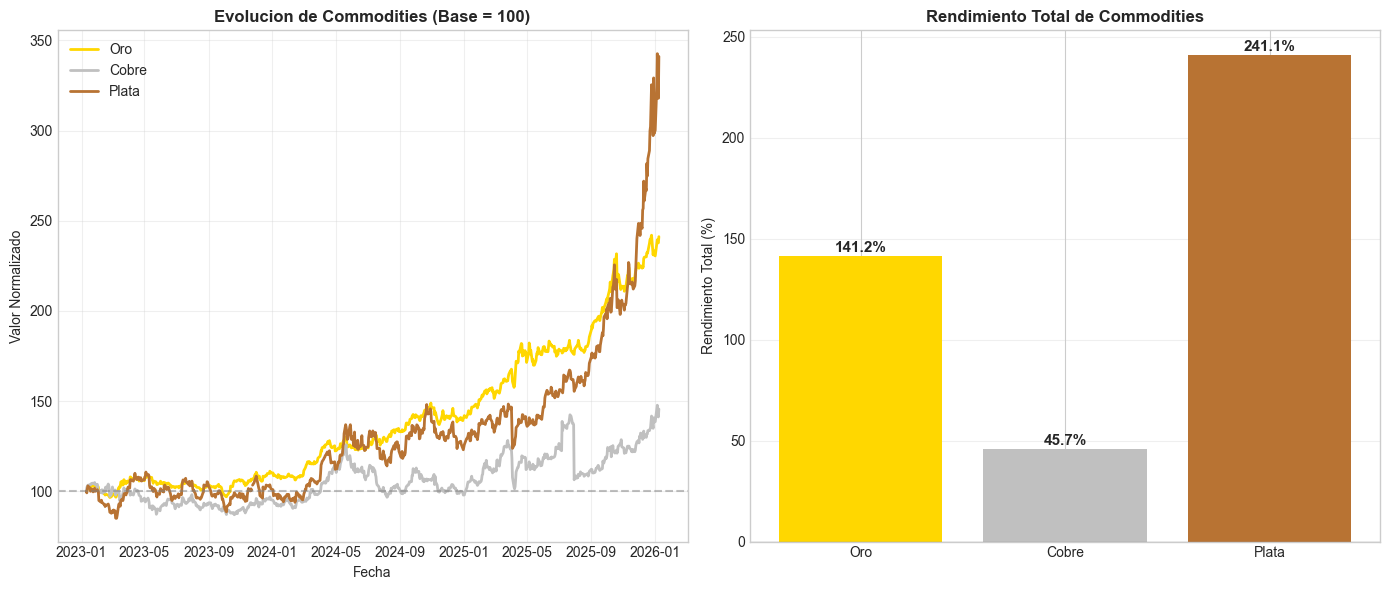

In [36]:
# Normalizar precios de commodities
commodities_norm = precios_commodities / precios_commodities.iloc[0] * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Precios normalizados
colores_comm = ['#FFD700', '#C0C0C0', '#B87333']  # Oro, Plata, Cobre
for i, comm in enumerate(commodities_norm.columns):
    axes[0].plot(commodities_norm.index, commodities_norm[comm], 
                 label=comm, color=colores_comm[i], linewidth=2)

axes[0].axhline(y=100, color='gray', linestyle='--', alpha=0.5)
axes[0].set_title('Evolucion de Commodities (Base = 100)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor Normalizado')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Rendimiento total
rend_comm = ((precios_commodities.iloc[-1] - precios_commodities.iloc[0]) / precios_commodities.iloc[0] * 100)
bars = axes[1].bar(rend_comm.index, rend_comm.values, color=colores_comm)
axes[1].set_ylabel('Rendimiento Total (%)')
axes[1].set_title('Rendimiento Total de Commodities', fontsize=12, fontweight='bold')
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].axhline(y=0, color='black', linewidth=0.8)

for bar, valor in zip(bars, rend_comm.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, valor + 2,
                 f'{valor:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 5.2 Correlacion: Mineras Peruanas vs Commodities

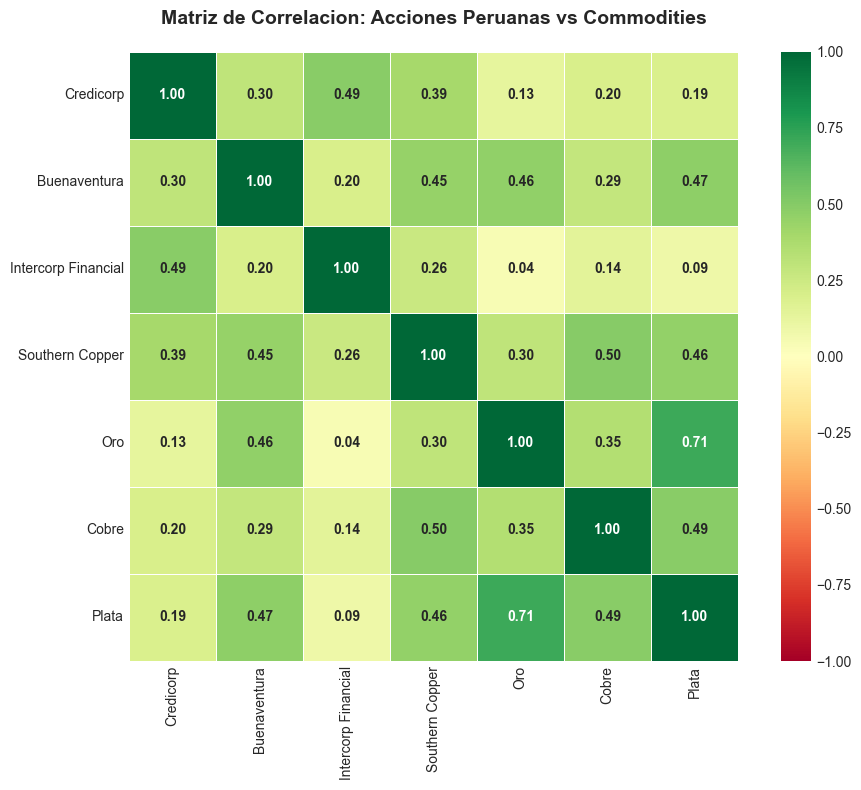


Interpretacion de Correlaciones Clave:
Southern Copper vs Cobre: 0.50
Buenaventura vs Oro: 0.46
Buenaventura vs Plata: 0.47


In [37]:
# Crear DataFrame combinado de retornos
# Alinear fechas
fechas_comunes = retornos_peru.index.intersection(retornos_commodities.index)

retornos_combinados = pd.concat([
    retornos_peru.loc[fechas_comunes],
    retornos_commodities.loc[fechas_comunes]
], axis=1)

# Matriz de correlacion
corr_matrix = retornos_combinados.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            square=True, linewidths=0.5, ax=ax, vmin=-1, vmax=1,
            annot_kws={'size': 10, 'weight': 'bold'})

ax.set_title('Matriz de Correlacion: Acciones Peruanas vs Commodities', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Interpretacion
print("\nInterpretacion de Correlaciones Clave:")
print("="*50)
print(f"Southern Copper vs Cobre: {corr_matrix.loc['Southern Copper', 'Cobre']:.2f}")
print(f"Buenaventura vs Oro: {corr_matrix.loc['Buenaventura', 'Oro']:.2f}")
print(f"Buenaventura vs Plata: {corr_matrix.loc['Buenaventura', 'Plata']:.2f}")

### 5.3 Regresion: Southern Copper vs Precio del Cobre

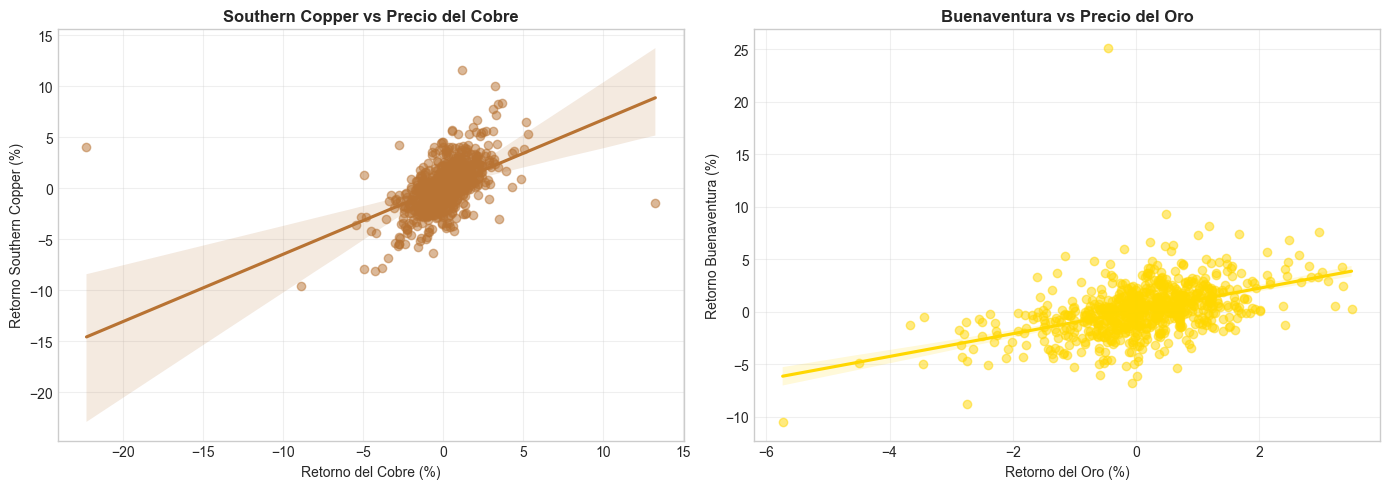

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Southern Copper vs Cobre
sns.regplot(x=retornos_combinados['Cobre']*100, 
            y=retornos_combinados['Southern Copper']*100,
            ax=axes[0], scatter_kws={'alpha': 0.5}, color='#B87333')
axes[0].set_xlabel('Retorno del Cobre (%)')
axes[0].set_ylabel('Retorno Southern Copper (%)')
axes[0].set_title('Southern Copper vs Precio del Cobre', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Buenaventura vs Oro
sns.regplot(x=retornos_combinados['Oro']*100, 
            y=retornos_combinados['Buenaventura']*100,
            ax=axes[1], scatter_kws={'alpha': 0.5}, color='#FFD700')
axes[1].set_xlabel('Retorno del Oro (%)')
axes[1].set_ylabel('Retorno Buenaventura (%)')
axes[1].set_title('Buenaventura vs Precio del Oro', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Metricas de Riesgo y Rendimiento

### 6.1 Calculo de Ratios Financieros

In [39]:
def calcular_metricas_riesgo(retornos, tasa_libre_riesgo=0.05):
    """
    Calcula metricas de riesgo para una serie de retornos.
    
    Parametros:
    -----------
    retornos : pd.Series
        Retornos diarios
    tasa_libre_riesgo : float
        Tasa libre de riesgo anual (default 5% - aproximado de bonos soberanos Peru)
    """
    dias_trading = 252
    
    # Retorno y volatilidad anualizados
    retorno_anual = retornos.mean() * dias_trading
    volatilidad_anual = retornos.std() * np.sqrt(dias_trading)
    
    # Ratio de Sharpe
    sharpe = (retorno_anual - tasa_libre_riesgo) / volatilidad_anual
    
    # Ratio de Sortino
    retornos_negativos = retornos[retornos < 0]
    downside_std = retornos_negativos.std() * np.sqrt(dias_trading)
    sortino = (retorno_anual - tasa_libre_riesgo) / downside_std if downside_std > 0 else np.nan
    
    # Maximo Drawdown
    acumulado = (1 + retornos).cumprod()
    maximo_acum = acumulado.cummax()
    drawdown = (acumulado - maximo_acum) / maximo_acum
    max_drawdown = drawdown.min()
    
    # Value at Risk (VaR) al 95%
    var_95 = retornos.quantile(0.05)
    
    # CVaR (Expected Shortfall)
    cvar_95 = retornos[retornos <= var_95].mean()
    
    return {
        'Retorno Anual': retorno_anual,
        'Volatilidad Anual': volatilidad_anual,
        'Ratio Sharpe': sharpe,
        'Ratio Sortino': sortino,
        'Max Drawdown': max_drawdown,
        'VaR (95%)': var_95,
        'CVaR (95%)': cvar_95,
        'Asimetria': retornos.skew(),
        'Curtosis': retornos.kurtosis()
    }

# Calcular metricas para cada accion
metricas_peru = {}
for accion in retornos_peru.columns:
    metricas_peru[accion] = calcular_metricas_riesgo(retornos_peru[accion])

# Crear DataFrame
metricas_df = pd.DataFrame(metricas_peru).T.round(4)

print("Metricas de Riesgo y Rendimiento - Acciones Peruanas")
print("="*70)
print("Nota: Tasa libre de riesgo = 5% (aproximado bonos soberanos Peru)")
print()
metricas_df

Metricas de Riesgo y Rendimiento - Acciones Peruanas
Nota: Tasa libre de riesgo = 5% (aproximado bonos soberanos Peru)



,Retorno Anual,Volatilidad Anual,Ratio Sharpe,Ratio Sortino,Max Drawdown,VaR (95%),CVaR (95%),Asimetria,Curtosis
Credicorp,0.30,0.25,0.99,1.44,-0.27,-0.02,-0.04,0.00,2.67
Buenaventura,0.54,0.39,1.27,2.11,-0.38,-0.04,-0.05,1.39,14.87
Intercorp Financial,0.27,0.26,0.85,1.28,-0.28,-0.03,-0.03,0.10,1.98
Southern Copper,0.40,0.37,0.95,1.49,-0.40,-0.04,-0.05,0.15,2.07


### 6.2 Visualizacion de Metricas de Riesgo

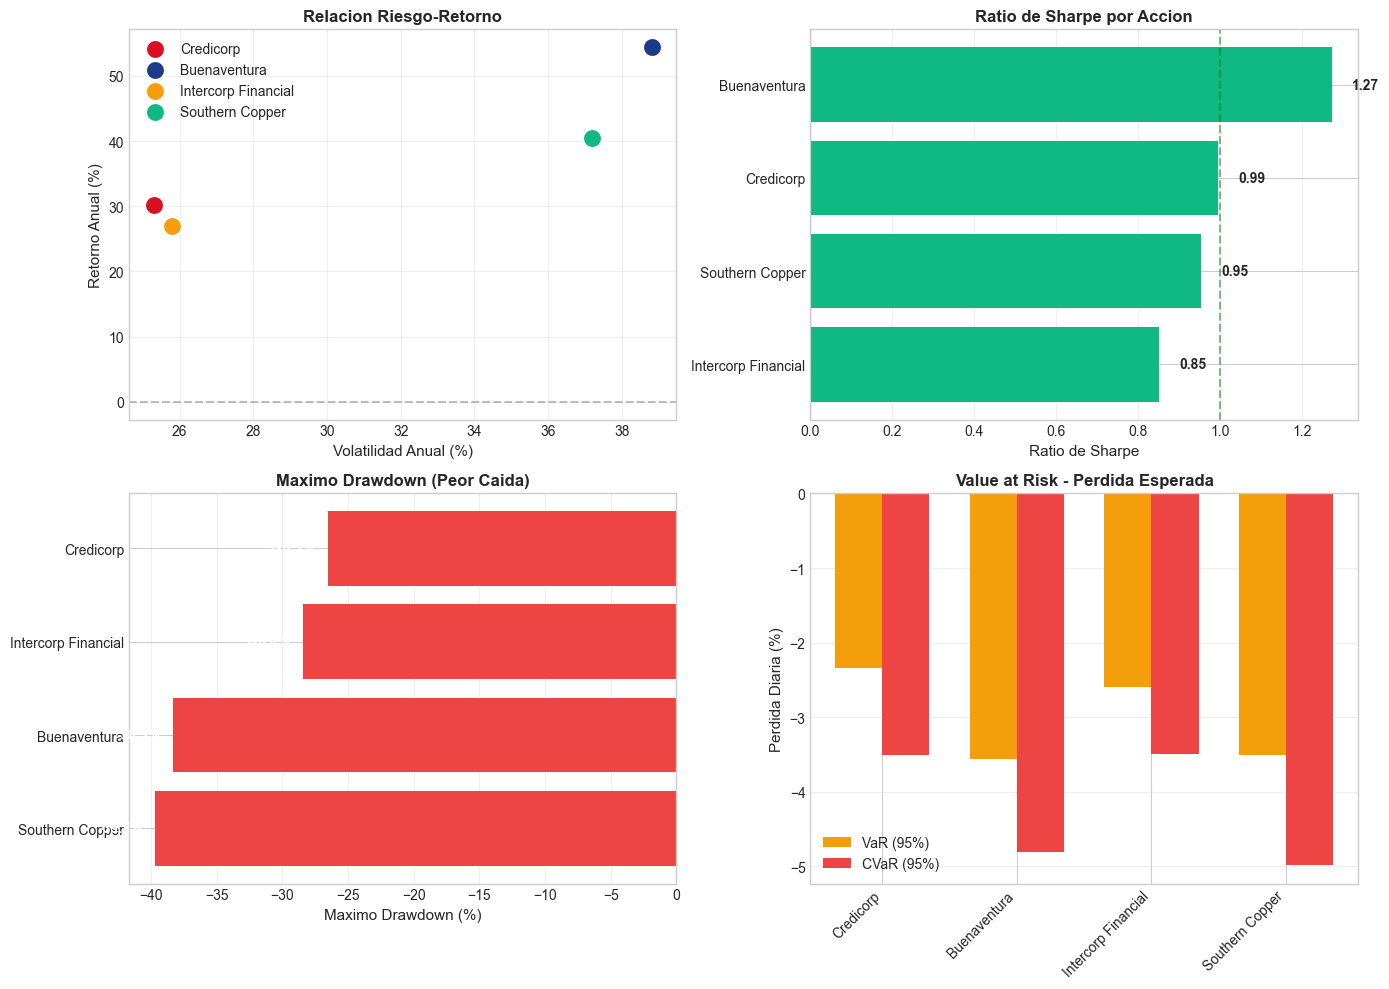

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Riesgo vs Retorno
ax1 = axes[0, 0]
for i, accion in enumerate(metricas_df.index):
    ax1.scatter(metricas_df.loc[accion, 'Volatilidad Anual'] * 100,
                metricas_df.loc[accion, 'Retorno Anual'] * 100,
                s=200, c=colores_peru[i], label=accion, 
                edgecolor='white', linewidth=2, zorder=5)

ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Volatilidad Anual (%)', fontsize=11)
ax1.set_ylabel('Retorno Anual (%)', fontsize=11)
ax1.set_title('Relacion Riesgo-Retorno', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Ratio de Sharpe
ax2 = axes[0, 1]
sharpe_sorted = metricas_df['Ratio Sharpe'].sort_values()
colores_sharpe = ['#10B981' if x > 0 else '#EF4444' for x in sharpe_sorted]
bars = ax2.barh(sharpe_sorted.index, sharpe_sorted.values, color=colores_sharpe)
ax2.axvline(x=0, color='black', linewidth=0.8)
ax2.axvline(x=1, color='green', linestyle='--', alpha=0.5)
ax2.set_xlabel('Ratio de Sharpe', fontsize=11)
ax2.set_title('Ratio de Sharpe por Accion', fontsize=12, fontweight='bold')
ax2.grid(True, axis='x', alpha=0.3)

for bar, valor in zip(bars, sharpe_sorted.values):
    ax2.text(valor + 0.05, bar.get_y() + bar.get_height()/2,
             f'{valor:.2f}', va='center', fontsize=10, fontweight='bold')

# 3. Maximo Drawdown
ax3 = axes[1, 0]
mdd_sorted = (metricas_df['Max Drawdown'] * 100).sort_values()
ax3.barh(mdd_sorted.index, mdd_sorted.values, color='#EF4444')
ax3.set_xlabel('Maximo Drawdown (%)', fontsize=11)
ax3.set_title('Maximo Drawdown (Peor Caida)', fontsize=12, fontweight='bold')
ax3.grid(True, axis='x', alpha=0.3)

for i, (accion, valor) in enumerate(mdd_sorted.items()):
    ax3.text(valor - 1, i, f'{valor:.1f}%', va='center', ha='right',
             fontsize=10, color='white', fontweight='bold')

# 4. VaR y CVaR
ax4 = axes[1, 1]
var_data = pd.DataFrame({
    'VaR (95%)': metricas_df['VaR (95%)'] * 100,
    'CVaR (95%)': metricas_df['CVaR (95%)'] * 100
})
x = np.arange(len(var_data.index))
width = 0.35
ax4.bar(x - width/2, var_data['VaR (95%)'], width, label='VaR (95%)', color='#F59E0B')
ax4.bar(x + width/2, var_data['CVaR (95%)'], width, label='CVaR (95%)', color='#EF4444')
ax4.set_ylabel('Perdida Diaria (%)', fontsize=11)
ax4.set_title('Value at Risk - Perdida Esperada', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(var_data.index, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### 6.3 Analisis de Drawdown

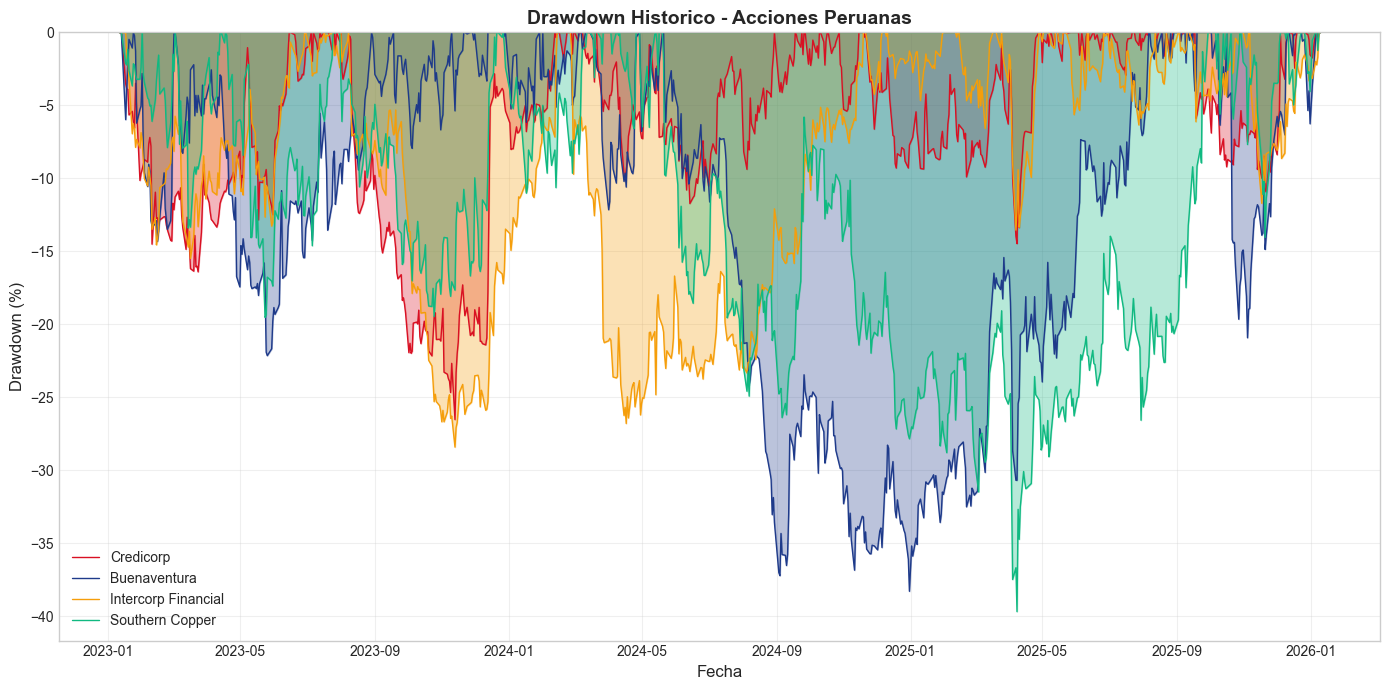

In [41]:
# Calcular drawdown para cada accion
def calcular_drawdown(retornos):
    acumulado = (1 + retornos).cumprod()
    maximo = acumulado.cummax()
    drawdown = (acumulado - maximo) / maximo * 100
    return drawdown

drawdowns_peru = retornos_peru.apply(calcular_drawdown)

fig, ax = plt.subplots(figsize=(14, 7))

for i, accion in enumerate(drawdowns_peru.columns):
    ax.fill_between(drawdowns_peru.index, drawdowns_peru[accion], 0, 
                    alpha=0.3, color=colores_peru[i])
    ax.plot(drawdowns_peru.index, drawdowns_peru[accion], 
            color=colores_peru[i], linewidth=1, label=accion)

ax.set_title('Drawdown Historico - Acciones Peruanas', fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Drawdown (%)', fontsize=12)
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_ylim(top=0)

plt.tight_layout()
plt.show()

## 7. Comparacion: Peru vs Mercados Internacionales

### 7.1 Rendimiento Comparativo

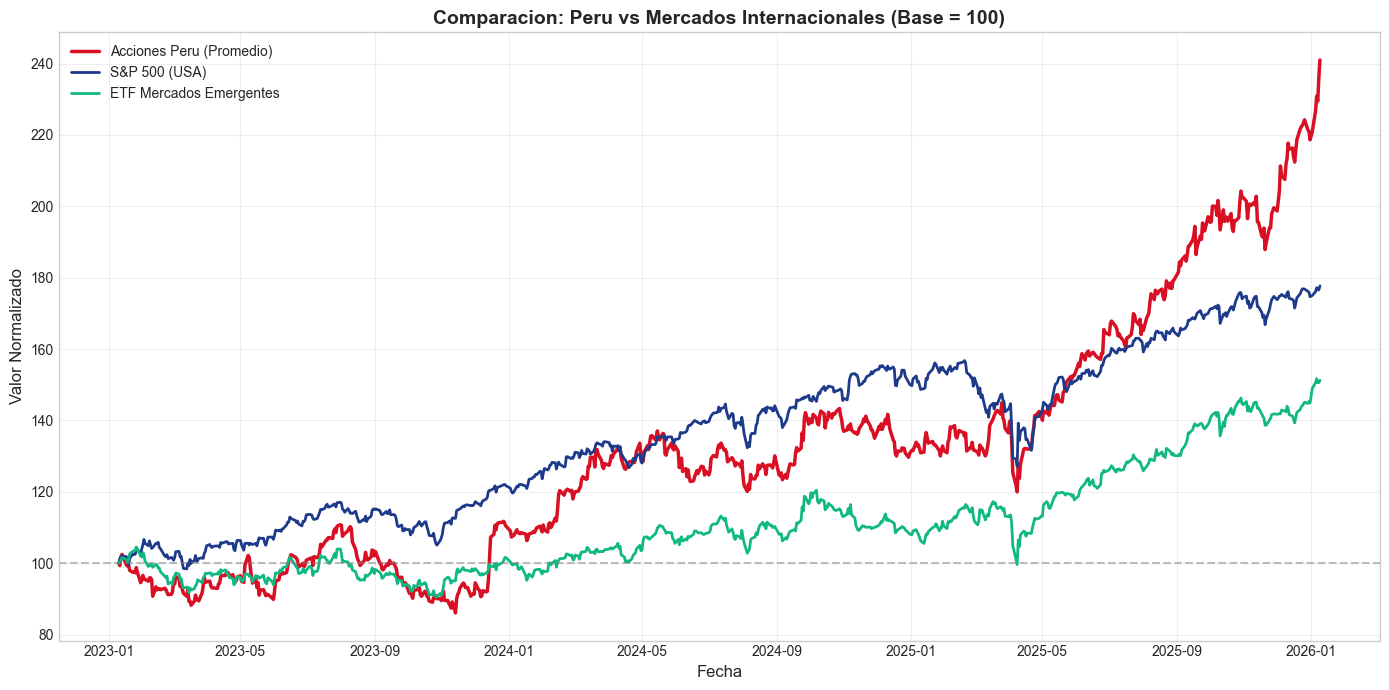


Rendimiento Total del Periodo:
Acciones Peru (Promedio): 141.0%
S&P 500: 77.7%
Mercados Emergentes: 51.2%


In [42]:
# Crear indice simple de acciones peruanas (equiponderado)
indice_peru = precios_peru.mean(axis=1)
indice_peru_norm = indice_peru / indice_peru.iloc[0] * 100

# Normalizar indices de referencia
indices_norm = precios_indices / precios_indices.iloc[0] * 100

# Alinear fechas
fechas_comunes = indice_peru_norm.index.intersection(indices_norm.index)

fig, ax = plt.subplots(figsize=(14, 7))

# Indice Peru
ax.plot(indice_peru_norm.loc[fechas_comunes], color='#D91023', 
        linewidth=2.5, label='Acciones Peru (Promedio)')

# S&P 500
ax.plot(indices_norm['S&P 500'].loc[fechas_comunes], color='#1E3A8A', 
        linewidth=2, label='S&P 500 (USA)')

# Mercados Emergentes
ax.plot(indices_norm['Mercados Emergentes'].loc[fechas_comunes], color='#10B981', 
        linewidth=2, label='ETF Mercados Emergentes')

ax.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax.set_title('Comparacion: Peru vs Mercados Internacionales (Base = 100)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Valor Normalizado', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular rendimientos totales
print("\nRendimiento Total del Periodo:")
print("="*40)
print(f"Acciones Peru (Promedio): {(indice_peru_norm.iloc[-1] - 100):.1f}%")
print(f"S&P 500: {(indices_norm['S&P 500'].iloc[-1] - 100):.1f}%")
print(f"Mercados Emergentes: {(indices_norm['Mercados Emergentes'].iloc[-1] - 100):.1f}%")

### 7.2 Correlacion con Mercados Internacionales

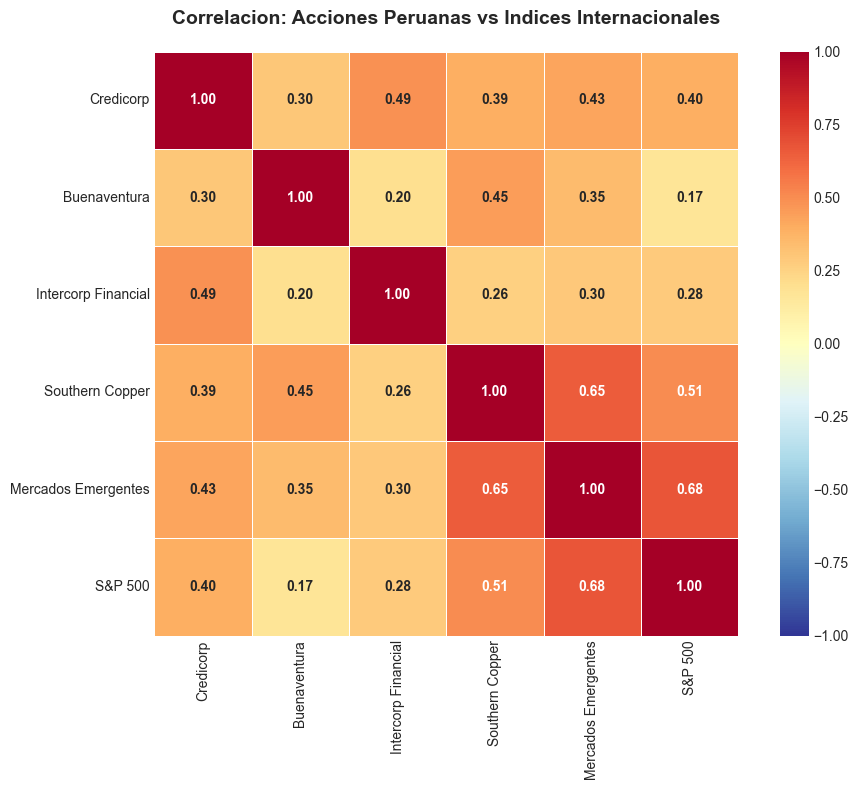

In [43]:
# Combinar retornos
fechas_comunes = retornos_peru.index.intersection(retornos_indices.index)

retornos_todos = pd.concat([
    retornos_peru.loc[fechas_comunes],
    retornos_indices.loc[fechas_comunes]
], axis=1)

# Matriz de correlacion
corr_todos = retornos_todos.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_todos, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, ax=ax, vmin=-1, vmax=1,
            annot_kws={'size': 10, 'weight': 'bold'})

ax.set_title('Correlacion: Acciones Peruanas vs Indices Internacionales', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

## 8. Impacto del Tipo de Cambio en Inversiones

### 8.1 Rendimiento en Soles vs Dolares

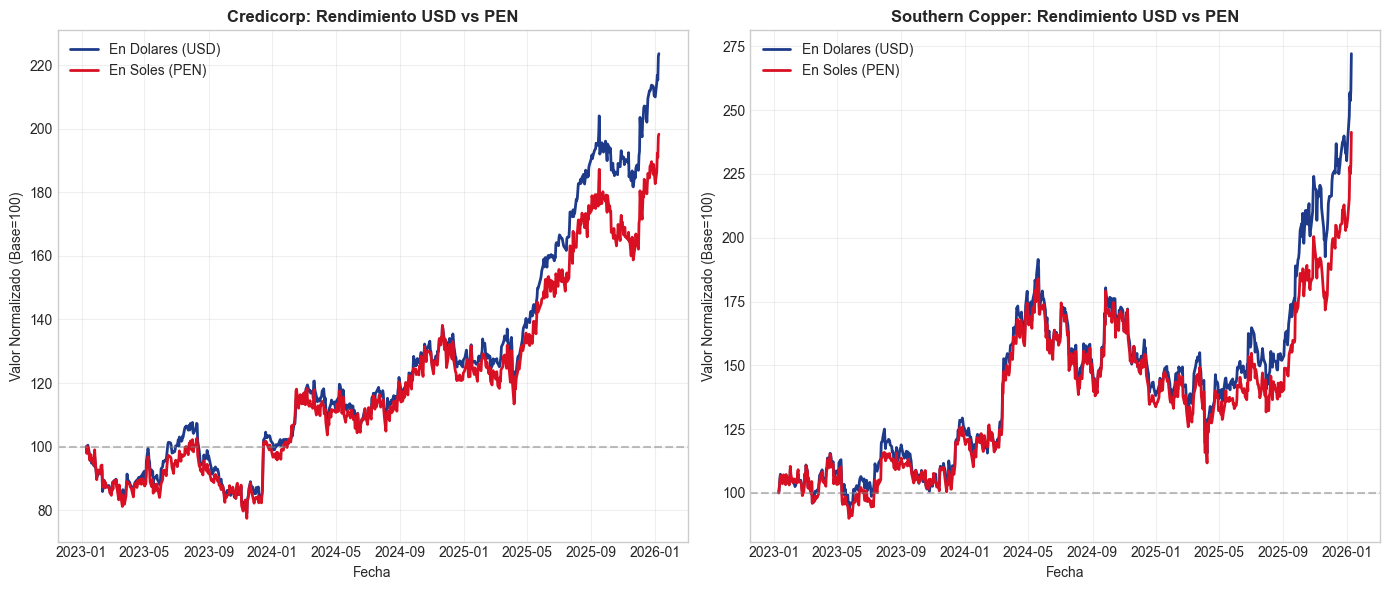


Diferencia de Rendimiento (Soles vs Dolares):
Credicorp:
  USD: +123.6% | PEN: +98.3% | Diferencia TC: -25.3%
Buenaventura:
  USD: +306.6% | PEN: +260.6% | Diferencia TC: -46.0%
Intercorp Financial:
  USD: +102.4% | PEN: +79.5% | Diferencia TC: -22.9%
Southern Copper:
  USD: +172.1% | PEN: +141.3% | Diferencia TC: -30.8%


In [44]:
# Calcular precios en Soles
# Alinear tipo de cambio con precios
fechas_comunes = precios_peru.index.intersection(tipo_cambio.index)

precios_usd = precios_peru.loc[fechas_comunes]
tc_alineado = tipo_cambio['Soles por Dolar'].loc[fechas_comunes]

# Convertir a Soles
precios_soles = precios_usd.multiply(tc_alineado, axis=0)

# Normalizar ambos
precios_usd_norm = precios_usd / precios_usd.iloc[0] * 100
precios_soles_norm = precios_soles / precios_soles.iloc[0] * 100

# Visualizar para Credicorp como ejemplo
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Credicorp
axes[0].plot(precios_usd_norm['Credicorp'], color='#1E3A8A', 
             linewidth=2, label='En Dolares (USD)')
axes[0].plot(precios_soles_norm['Credicorp'], color='#D91023', 
             linewidth=2, label='En Soles (PEN)')
axes[0].axhline(y=100, color='gray', linestyle='--', alpha=0.5)
axes[0].set_title('Credicorp: Rendimiento USD vs PEN', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Valor Normalizado (Base=100)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Southern Copper
axes[1].plot(precios_usd_norm['Southern Copper'], color='#1E3A8A', 
             linewidth=2, label='En Dolares (USD)')
axes[1].plot(precios_soles_norm['Southern Copper'], color='#D91023', 
             linewidth=2, label='En Soles (PEN)')
axes[1].axhline(y=100, color='gray', linestyle='--', alpha=0.5)
axes[1].set_title('Southern Copper: Rendimiento USD vs PEN', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Valor Normalizado (Base=100)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de diferencias
print("\nDiferencia de Rendimiento (Soles vs Dolares):")
print("="*50)
for empresa in precios_peru.columns:
    rend_usd = precios_usd_norm[empresa].iloc[-1] - 100
    rend_pen = precios_soles_norm[empresa].iloc[-1] - 100
    diferencia = rend_pen - rend_usd
    print(f"{empresa}:")
    print(f"  USD: {rend_usd:+.1f}% | PEN: {rend_pen:+.1f}% | Diferencia TC: {diferencia:+.1f}%")

### 8.2 Volatilidad del Tipo de Cambio

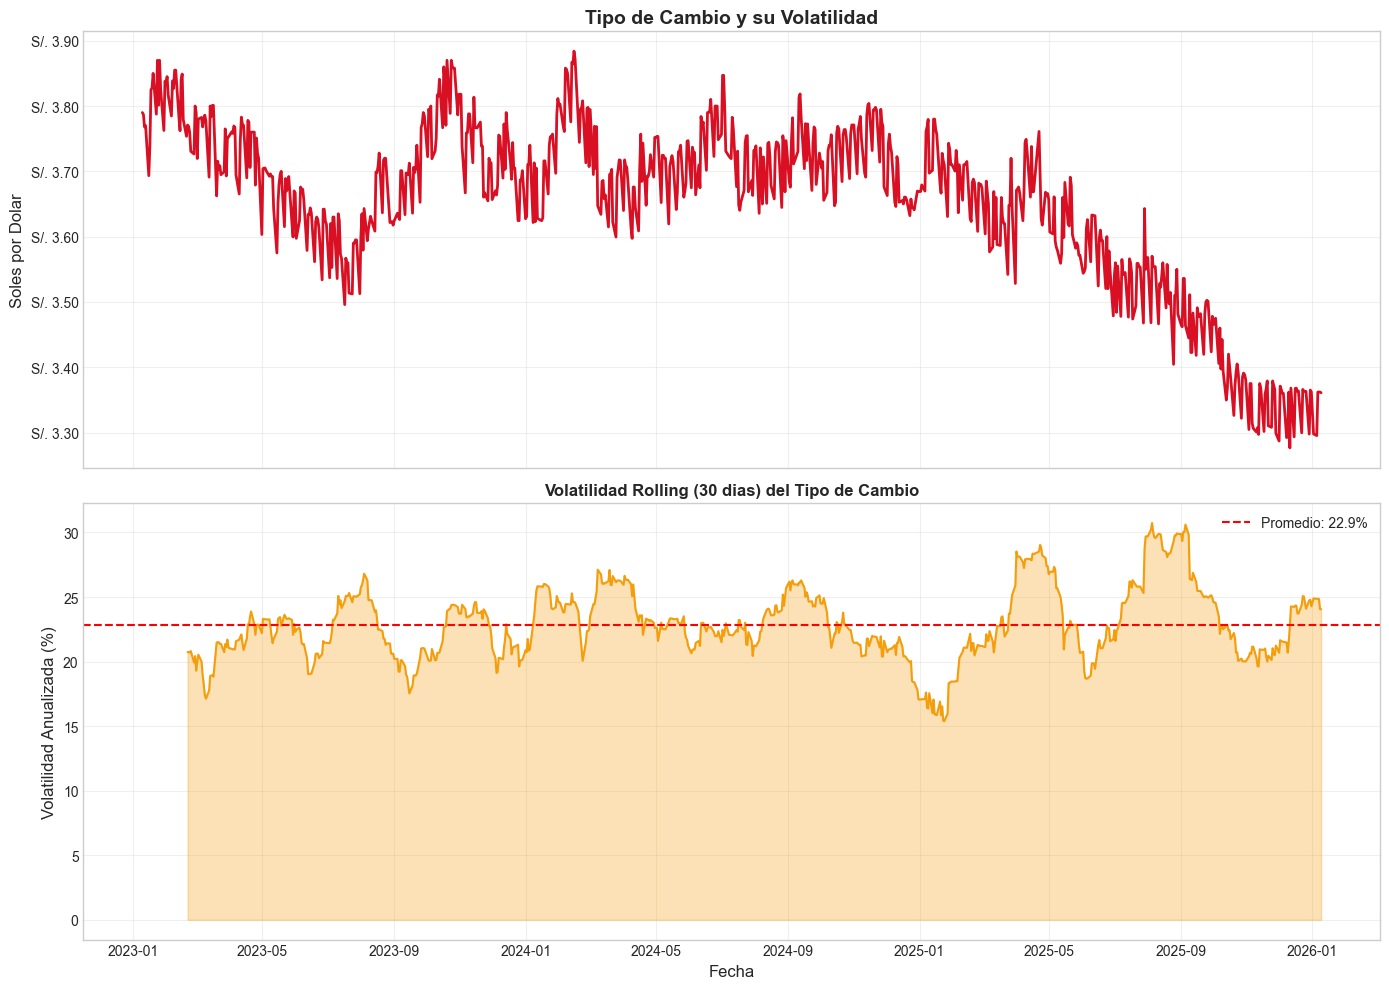

In [45]:
# Volatilidad rolling del tipo de cambio
ventana = 30
vol_tc_rolling = retornos_tc.rolling(ventana).std() * np.sqrt(252) * 100

fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Tipo de cambio
axes[0].plot(tipo_cambio['Soles por Dolar'], color='#D91023', linewidth=2)
axes[0].set_ylabel('Soles por Dolar', fontsize=12)
axes[0].set_title('Tipo de Cambio y su Volatilidad', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'S/. {x:.2f}'))

# Volatilidad rolling
axes[1].fill_between(vol_tc_rolling.index, vol_tc_rolling.values, 
                      alpha=0.3, color='#F59E0B')
axes[1].plot(vol_tc_rolling.index, vol_tc_rolling.values, 
             color='#F59E0B', linewidth=1.5)
axes[1].axhline(y=vol_tc_rolling.mean(), color='red', linestyle='--', 
                label=f'Promedio: {vol_tc_rolling.mean():.1f}%')
axes[1].set_xlabel('Fecha', fontsize=12)
axes[1].set_ylabel('Volatilidad Anualizada (%)', fontsize=12)
axes[1].set_title(f'Volatilidad Rolling ({ventana} dias) del Tipo de Cambio', 
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Dashboard Financiero Peru

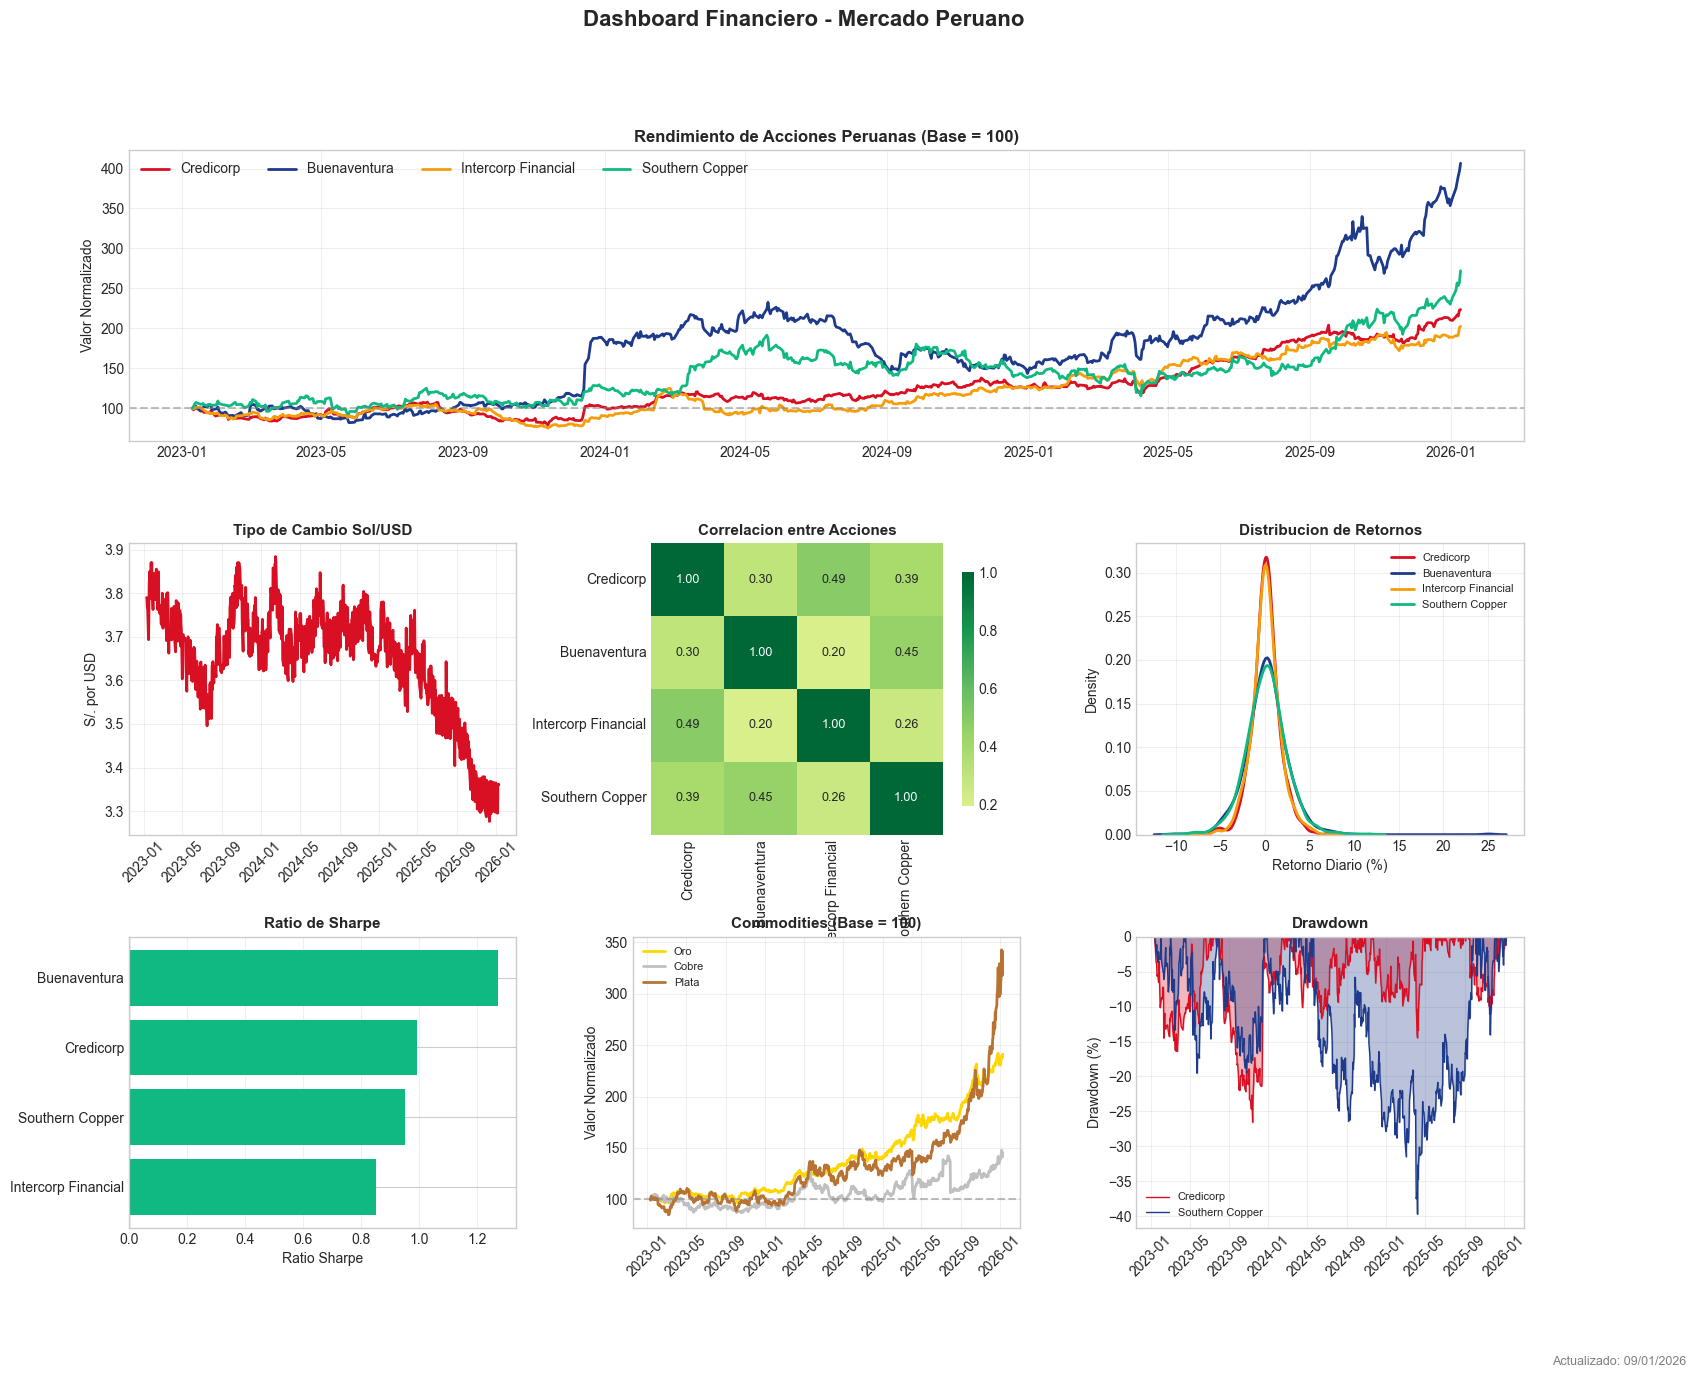

In [46]:
# Crear dashboard comprehensivo
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# 1. Precios de acciones (fila superior, ancho completo)
ax1 = fig.add_subplot(gs[0, :])
for i, empresa in enumerate(precios_norm.columns):
    ax1.plot(precios_norm.index, precios_norm[empresa], 
             color=colores_peru[i], linewidth=2, label=empresa)
ax1.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax1.set_title('Rendimiento de Acciones Peruanas (Base = 100)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valor Normalizado')
ax1.legend(loc='upper left', ncol=4)
ax1.grid(True, alpha=0.3)

# 2. Tipo de cambio (fila media izquierda)
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(tipo_cambio['Soles por Dolar'], color='#D91023', linewidth=2)
ax2.set_title('Tipo de Cambio Sol/USD', fontsize=11, fontweight='bold')
ax2.set_ylabel('S/. por USD')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Correlacion (fila media centro)
ax3 = fig.add_subplot(gs[1, 1])
sns.heatmap(retornos_peru.corr(), annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, ax=ax3, cbar_kws={'shrink': 0.8}, square=True,
            annot_kws={'size': 9})
ax3.set_title('Correlacion entre Acciones', fontsize=11, fontweight='bold')

# 4. Distribucion de retornos (fila media derecha)
ax4 = fig.add_subplot(gs[1, 2])
for i, empresa in enumerate(retornos_peru.columns):
    sns.kdeplot(retornos_peru[empresa]*100, ax=ax4, label=empresa, 
                color=colores_peru[i], linewidth=2)
ax4.set_title('Distribucion de Retornos', fontsize=11, fontweight='bold')
ax4.set_xlabel('Retorno Diario (%)')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)

# 5. Ratio Sharpe (fila inferior izquierda)
ax5 = fig.add_subplot(gs[2, 0])
sharpe_vals = metricas_df['Ratio Sharpe'].sort_values()
colors_sharpe = ['#10B981' if x > 0 else '#EF4444' for x in sharpe_vals]
ax5.barh(sharpe_vals.index, sharpe_vals.values, color=colors_sharpe)
ax5.axvline(x=0, color='black', linewidth=0.8)
ax5.set_xlabel('Ratio Sharpe')
ax5.set_title('Ratio de Sharpe', fontsize=11, fontweight='bold')
ax5.grid(True, axis='x', alpha=0.3)

# 6. Commodities (fila inferior centro)
ax6 = fig.add_subplot(gs[2, 1])
comm_norm = precios_commodities / precios_commodities.iloc[0] * 100
for i, comm in enumerate(comm_norm.columns):
    ax6.plot(comm_norm.index, comm_norm[comm], 
             color=colores_comm[i], linewidth=2, label=comm)
ax6.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
ax6.set_title('Commodities (Base = 100)', fontsize=11, fontweight='bold')
ax6.set_ylabel('Valor Normalizado')
ax6.legend(fontsize=8)
ax6.grid(True, alpha=0.3)
ax6.tick_params(axis='x', rotation=45)

# 7. Drawdown (fila inferior derecha)
ax7 = fig.add_subplot(gs[2, 2])
for i, empresa in enumerate(['Credicorp', 'Southern Copper']):
    ax7.fill_between(drawdowns_peru.index, drawdowns_peru[empresa], 0,
                     alpha=0.3, color=colores_peru[i])
    ax7.plot(drawdowns_peru.index, drawdowns_peru[empresa],
             color=colores_peru[i], linewidth=1, label=empresa)
ax7.set_title('Drawdown', fontsize=11, fontweight='bold')
ax7.set_ylabel('Drawdown (%)')
ax7.legend(fontsize=8)
ax7.set_ylim(top=0)
ax7.grid(True, alpha=0.3)
ax7.tick_params(axis='x', rotation=45)

plt.suptitle('Dashboard Financiero - Mercado Peruano', 
             fontsize=16, fontweight='bold', y=0.98)

# Agregar fecha de actualizacion
fig.text(0.99, 0.01, f'Actualizado: {datetime.now().strftime("%d/%m/%Y")}', 
         ha='right', va='bottom', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

## 10. Resumen y Conclusiones

In [47]:
# Resumen final
print("="*70)
print("RESUMEN DEL ANALISIS - MERCADO FINANCIERO PERUANO")
print("="*70)
print(f"\nPeriodo de analisis: {fecha_inicio.strftime('%d/%m/%Y')} - {fecha_fin.strftime('%d/%m/%Y')}")
print(f"Dias de trading analizados: {len(precios_peru)}")

print("\n" + "-"*70)
print("RENDIMIENTOS TOTALES")
print("-"*70)
for empresa in precios_peru.columns:
    rend = (precios_peru[empresa].iloc[-1] / precios_peru[empresa].iloc[0] - 1) * 100
    print(f"{empresa}: {rend:+.1f}%")

print("\n" + "-"*70)
print("TIPO DE CAMBIO")
print("-"*70)
tc_inicio = tipo_cambio['Soles por Dolar'].iloc[0]
tc_fin = tipo_cambio['Soles por Dolar'].iloc[-1]
tc_var = (tc_fin / tc_inicio - 1) * 100
print(f"Inicio: S/. {tc_inicio:.2f}")
print(f"Actual: S/. {tc_fin:.2f}")
print(f"Variacion: {tc_var:+.1f}% ({'Depreciacion' if tc_var > 0 else 'Apreciacion'} del Sol)")

print("\n" + "-"*70)
print("MEJORES Y PEORES DESEMPENIOS")
print("-"*70)
rendimientos = {e: (precios_peru[e].iloc[-1] / precios_peru[e].iloc[0] - 1) * 100 
                for e in precios_peru.columns}
mejor = max(rendimientos, key=rendimientos.get)
peor = min(rendimientos, key=rendimientos.get)
print(f"Mejor desempeno: {mejor} ({rendimientos[mejor]:+.1f}%)")
print(f"Peor desempeno: {peor} ({rendimientos[peor]:+.1f}%)")

print("\n" + "-"*70)
print("METRICAS DE RIESGO CLAVE")
print("-"*70)
print(f"Accion mas volatil: {metricas_df['Volatilidad Anual'].idxmax()} ({metricas_df['Volatilidad Anual'].max()*100:.1f}% anual)")
print(f"Mejor Ratio Sharpe: {metricas_df['Ratio Sharpe'].idxmax()} ({metricas_df['Ratio Sharpe'].max():.2f})")
print(f"Mayor Drawdown: {metricas_df['Max Drawdown'].idxmin()} ({metricas_df['Max Drawdown'].min()*100:.1f}%)")

print("\n" + "="*70)
print("Analisis completado exitosamente!")
print("="*70)

RESUMEN DEL ANALISIS - MERCADO FINANCIERO PERUANO

Periodo de analisis: 10/01/2023 - 09/01/2026
Dias de trading analizados: 753

----------------------------------------------------------------------
RENDIMIENTOS TOTALES
----------------------------------------------------------------------
Credicorp: +123.6%
Buenaventura: +306.6%
Intercorp Financial: +102.4%
Southern Copper: +172.1%

----------------------------------------------------------------------
TIPO DE CAMBIO
----------------------------------------------------------------------
Inicio: S/. 3.79
Actual: S/. 3.36
Variacion: -11.3% (Apreciacion del Sol)

----------------------------------------------------------------------
MEJORES Y PEORES DESEMPENIOS
----------------------------------------------------------------------
Mejor desempeno: Buenaventura (+306.6%)
Peor desempeno: Intercorp Financial (+102.4%)

----------------------------------------------------------------------
METRICAS DE RIESGO CLAVE
--------------------------

## 11. Ejercicios Propuestos

### Para practicar:

1. **Analisis Sectorial**: Agregar mas empresas peruanas (Alicorp, Ferreycorp) y analizar por sector.

2. **Portafolio Optimo**: Construir un portafolio de minima varianza con las acciones peruanas.

3. **Analisis de Eventos**: Identificar como afectaron eventos politicos (elecciones, cambios de gobierno) a los precios.

4. **Comparacion Regional**: Comparar el rendimiento de acciones peruanas vs chilenas, colombianas y mexicanas.

5. **Cobertura Cambiaria**: Calcular el costo/beneficio de cubrir la exposicion al tipo de cambio.

### Recursos adicionales:

- **BVL**: https://www.bvl.com.pe/
- **BCRP**: https://www.bcrp.gob.pe/
- **SMV**: https://www.smv.gob.pe/

In [48]:
print("Felicitaciones! Has completado el tutorial de Finanzas Peru.")
print("\nAhora sabes como:")
print("  - Analizar acciones peruanas y su relacion con commodities")
print("  - Evaluar el impacto del tipo de cambio en inversiones")
print("  - Calcular metricas de riesgo relevantes")
print("  - Comparar el mercado peruano con indices internacionales")
print("  - Crear visualizaciones profesionales para analisis financiero")

Felicitaciones! Has completado el tutorial de Finanzas Peru.

Ahora sabes como:
  - Analizar acciones peruanas y su relacion con commodities
  - Evaluar el impacto del tipo de cambio en inversiones
  - Calcular metricas de riesgo relevantes
  - Comparar el mercado peruano con indices internacionales
  - Crear visualizaciones profesionales para analisis financiero
